In [28]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os, glob, sys, numpy as np
from sklearn.model_selection import train_test_split


In [29]:
img_dir = '/content/drive/MyDrive/train'
categories = ['rare', 'welldone']
np_classes = len(categories)
image_w = 64
image_h = 64
pixel = image_w * image_h 




X = []
y = []

for idx, cat in enumerate(categories):
    img_dir_detail = img_dir + "/" + cat
    files = glob.glob(img_dir_detail+"/*.jpg")


    for i, f in enumerate(files):
        try:
            img = Image.open(f)
            img = img.convert("RGB")
            img = img.resize((image_w, image_h))
            data = np.asarray(img)
            #Y는 0 아니면 1이니까 idx값으로 넣는다.
            X.append(data)
            y.append(idx)
            if i % 300 == 0:
                print(cat, " : ", f)
        except:
            print(cat, str(i)+" 번째에서 에러 ")
X = np.array(X)
Y = np.array(y)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

rare  :  /content/drive/MyDrive/train/rare/802.jpg
rare  :  /content/drive/MyDrive/train/rare/rare (657).jpg
welldone  :  /content/drive/MyDrive/train/welldone/781.jpg
welldone  :  /content/drive/MyDrive/train/welldone/welldone (229).jpg
welldone  :  /content/drive/MyDrive/train/welldone/welldone (523).jpg


In [30]:
X_train.shape

(736, 64, 64, 3)

In [31]:
Y_train

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,

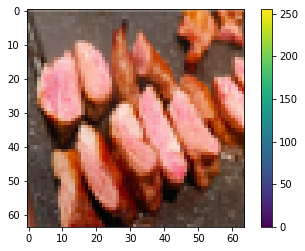

In [32]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [33]:
train_images = X_train / 255.0

test_images = X_test / 255.0

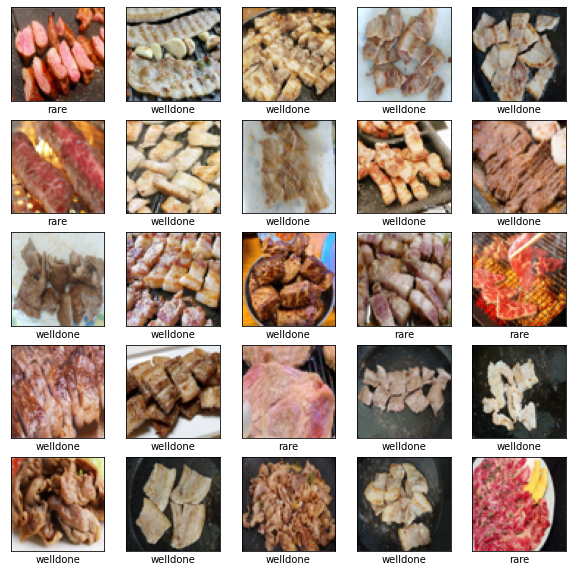

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(categories[Y_train[i]])
plt.show()

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
import matplotlib.pyplot as plt
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=25, verbose=1)
print(history.history)

Epoch 1/25
18/18 [==============================] - 1s 25ms/step - loss: 1076.6854 - accuracy: 0.5254 - val_loss: 280.4977 - val_accuracy: 0.6467
Epoch 2/25
18/18 [==============================] - 0s 15ms/step - loss: 305.7146 - accuracy: 0.6558 - val_loss: 240.0413 - val_accuracy: 0.6793
Epoch 3/25
18/18 [==============================] - 0s 13ms/step - loss: 90.2647 - accuracy: 0.7917 - val_loss: 289.6385 - val_accuracy: 0.4457
Epoch 4/25
18/18 [==============================] - 0s 14ms/step - loss: 113.0719 - accuracy: 0.7192 - val_loss: 48.4010 - val_accuracy: 0.7880
Epoch 5/25
18/18 [==============================] - 0s 14ms/step - loss: 59.5979 - accuracy: 0.7899 - val_loss: 48.4627 - val_accuracy: 0.7989
Epoch 6/25
18/18 [==============================] - 0s 14ms/step - loss: 25.4904 - accuracy: 0.8804 - val_loss: 166.5564 - val_accuracy: 0.6848
Epoch 7/25
18/18 [==============================] - 0s 14ms/step - loss: 48.0448 - accuracy: 0.8134 - val_loss: 176.4881 - val_accurac

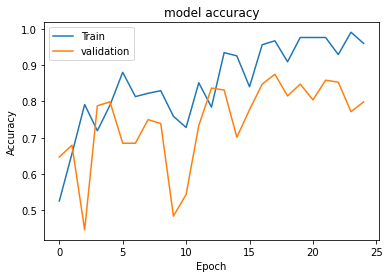

In [38]:
# 훈련과정 시각화(정확도)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

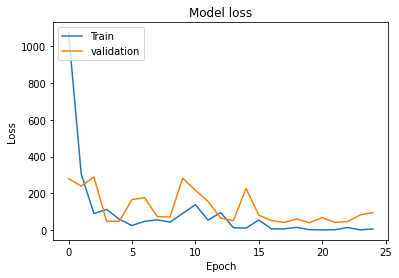

In [39]:
# 7 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [54]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

10/10 - 0s - loss: 87.9516 - accuracy: 0.8228

테스트 정확도: 0.8227847814559937


In [41]:
predictions = model.predict(X_test)

In [42]:
predictions[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [43]:
np.argmax(predictions[0])

1

In [44]:
Y_test[0]

1

In [45]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(categories[predicted_label],
                                100*np.max(predictions_array),
                                categories[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

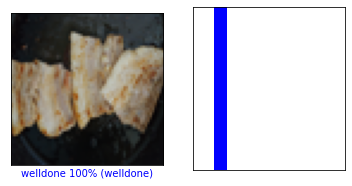

In [46]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, Y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  Y_test)
plt.show()

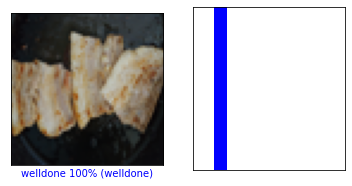

In [47]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, Y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  Y_test)
plt.show()

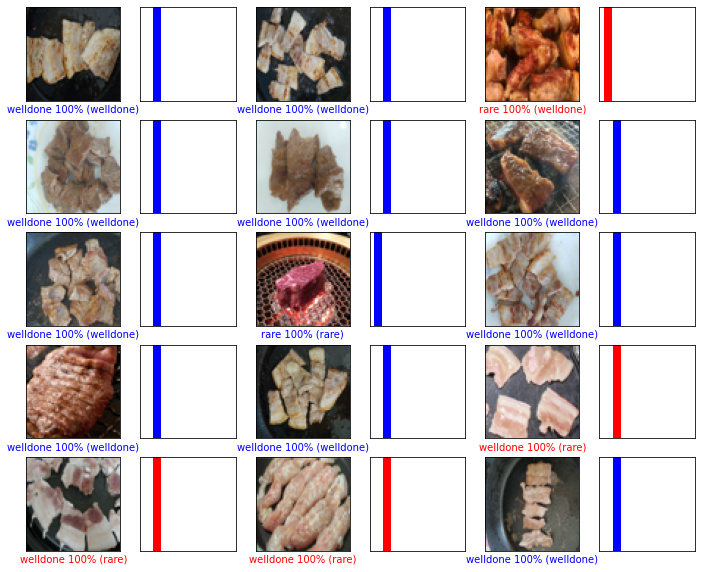

In [48]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, Y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, Y_test)
plt.show()

In [49]:
img = X_test[0]

print(img.shape)

(64, 64, 3)


In [50]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 64, 64, 3)


In [51]:
predictions_single = model.predict(img)

print(predictions_single)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


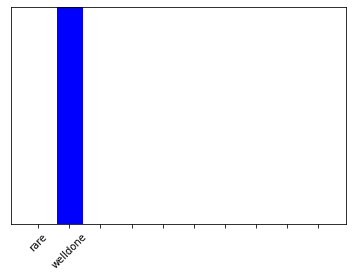

In [52]:
plot_value_array(0, predictions_single, Y_test)
_ = plt.xticks(range(10), categories, rotation=45)

In [53]:
np.argmax(predictions_single[0])

1